In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
city = "Sicklerville"
content = "review"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    4251 non-null   object
 1   user_id      4251 non-null   object
 2   business_id  4251 non-null   object
 3   stars        4251 non-null   int64 
 4   useful       4251 non-null   int64 
 5   funny        4251 non-null   int64 
 6   cool         4251 non-null   int64 
 7   text         4251 non-null   object
 8   date         4251 non-null   object
dtypes: int64(4), object(5)
memory usage: 299.0+ KB


In [4]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2EWzdYnK7WiOIVAD9_up_Q,1lm9t9D8Sh_YlF69ER0U4w,U26emOgS31JH5COcVpFOpA,5,0,0,1,I love this salon! They are so friendly! Ther...,2017-03-15 14:40:48
1,YnJkzT5XvvJq3dmRpoQ2Zg,HH8pdzyQhr1oHT-9aZkWTA,rIIxv89vth24E_mRn_p-kQ,1,0,0,0,Rude. Had me wait while they took other people...,2017-01-14 21:09:51
2,Xe__9plcT4VI1oAfv9f24Q,nGWeAnwjnb6xZDcMgv2eIw,0pL-eq0ufX5jMDgVAvoHHw,3,0,0,0,2nd time here on Saturday at 6. Reservations w...,2017-05-13 23:29:39
3,Tjwfp4HWCa-hpadERKxLWg,lQc6TSiehV8vSpCHnWxQcQ,e7vnHEpZdU83u2ZERPSDpg,1,0,1,0,Wanted to try this place for the first time. W...,2018-01-21 13:07:04
4,_Sp7BsxfzYJh_pTnMEemUw,4tnd3k-foRbvHLNCHVUEdA,rnioJAG4aQp2TJHUxLy7CQ,4,1,0,0,"Pikpon is a small, clean and spicy little shop...",2018-03-04 00:34:24


In [5]:
df.duplicated().sum()

0

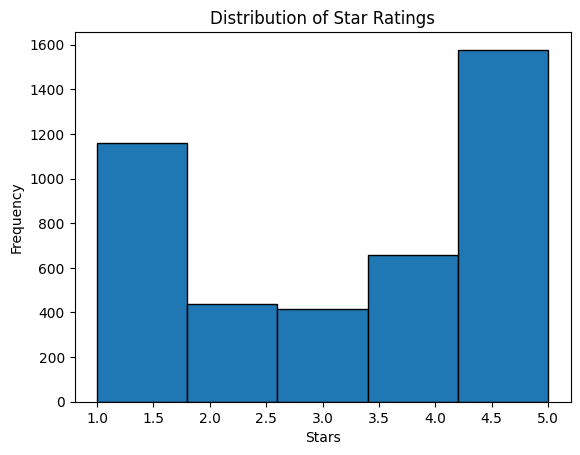

In [6]:
plt.hist(df['stars'], bins=5, edgecolor='black')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

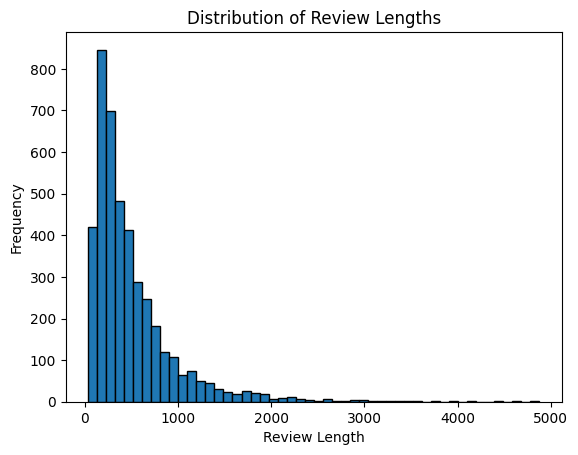

In [7]:
df['review_length'] = df['text'].apply(len)
plt.hist(df['review_length'], bins=50, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

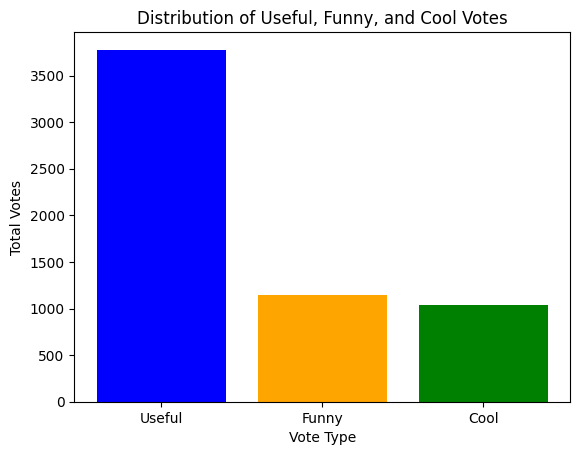

In [8]:
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()
totals = {'Useful': total_useful, 'Funny': total_funny, 'Cool': total_cool}

plt.bar(totals.keys(), totals.values(), color=['blue', 'orange', 'green'])
plt.title('Distribution of Useful, Funny, and Cool Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

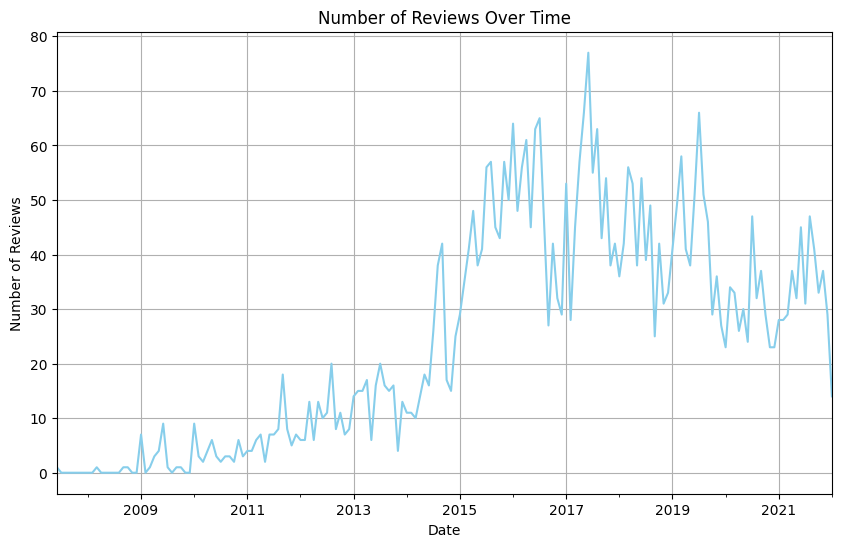

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
reviews_over_time = df.resample('ME').size()

plt.figure(figsize=(10, 6))
reviews_over_time.plot(color='skyblue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()